# Chip Retail Analysis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_row", 500)
import datetime

In [4]:
dataset =  pd.read_csv("QVI_purchase_behaviour.csv")
#transactions_df = pd.read_excel("QVI_transaction_data.xlsx")
#transactions_df.to_csv("transcation_csv.csv", index =  False, encoding="utf-8")
transaction_df = pd.read_csv("transcation_csv.csv")
data = dataset.copy()


In [3]:
dataset.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/05/19,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/05/19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/08/18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/08/18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print(dataset.shape)
print(transaction_df.shape)

(72637, 3)
(264836, 8)


#### Fist Start with Customer Behaviour file.

In [6]:
# check for dublicate data

card_no = len(set(dataset.LYLTY_CARD_NBR))
card_no_total = dataset.shape[0]
dub_card =  card_no_total - card_no
print(dub_card)

0


In [7]:
# firsr start start analysing customer csv_file
# set index as LYLTY_CARD_NBR
dataset.set_index("LYLTY_CARD_NBR", inplace = True)
#dataset.set_index("LYLTY_CARD_NBR", inplace = True)
dataset.head()


,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,
1000,YOUNG SINGLES/COUPLES,Premium
1002,YOUNG SINGLES/COUPLES,Mainstream
1003,YOUNG FAMILIES,Budget
1004,OLDER SINGLES/COUPLES,Mainstream
1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72637 entries, 1000 to 2373711
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LIFESTAGE         72637 non-null  object
 1   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [9]:
dataset.isnull().sum()

LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
dataset.isnull().sum()

LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There is no missing  values in this csv file.

### Count the number of customer in each segments 

In [11]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [12]:
print(data["LIFESTAGE"].value_counts())
      

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

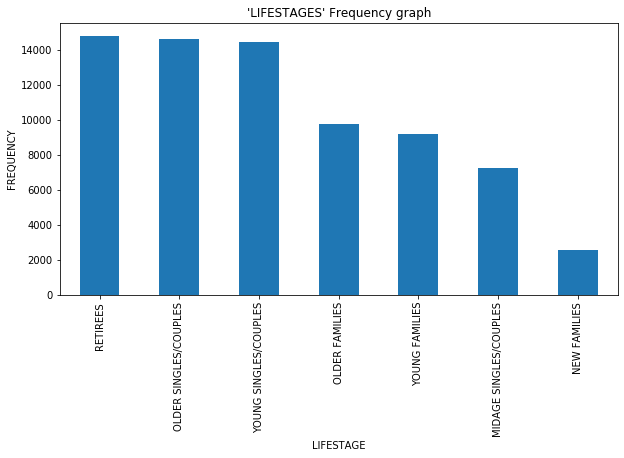

In [13]:
data["LIFESTAGE"].value_counts(normalize = False).plot(kind = "bar", figsize = [10, 5])
plt.title("'LIFESTAGES' Frequency graph")
plt.xlabel("LIFESTAGE")
plt.ylabel("FREQUENCY")
data["LIFESTAGE"].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

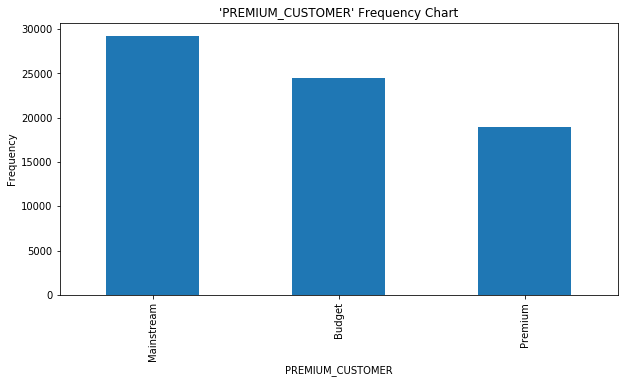

In [14]:
dataset["PREMIUM_CUSTOMER"].value_counts().plot(kind = "bar", figsize = [10, 5])
plt.title("'PREMIUM_CUSTOMER' Frequency Chart")
plt.xlabel("PREMIUM_CUSTOMER")
plt.ylabel("Frequency")

dataset["PREMIUM_CUSTOMER"].value_counts()

#### Last step is to check for right data type.


In [15]:
dataset.dtypes

LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

### Customer Transcation file.

In [16]:
trans_df  = transaction_df.copy()
trans_df.head()
print(trans_df.shape)

(264836, 8)


#### Check Dublicate

In [17]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


There is no problem with data type.

#### Check for missing values

In [18]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

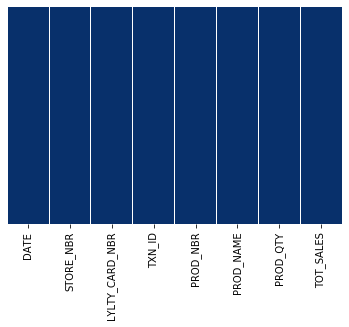

In [19]:
sns.heatmap(trans_df.isnull(),yticklabels = False, cbar = False, cmap = "Blues_r")

We dont have any missing values in this dataset.

In [20]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/05/19,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/05/19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/08/18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/08/18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [21]:
transaction_df.set_index("LYLTY_CARD_NBR", inplace = True)

In [22]:
transaction_df.head()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,,,,,,,
1000,17/10/18,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1307,14/05/19,1,348,66,CCs Nacho Cheese 175g,3,6.3
1343,20/05/19,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2373,17/08/18,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
2426,18/08/18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [25]:
transaction_df["DATE"] = pd.to_datetime(transaction_df["DATE"])
transaction_df.head()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,,,,,,,
1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1307,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
1343,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2373,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
2426,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [27]:
transaction_df["DATE"].dtype

dtype('<M8[ns]')

In [28]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 1000 to 272380
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DATE       264836 non-null  datetime64[ns]
 1   STORE_NBR  264836 non-null  int64         
 2   TXN_ID     264836 non-null  int64         
 3   PROD_NBR   264836 non-null  int64         
 4   PROD_NAME  264836 non-null  object        
 5   PROD_QTY   264836 non-null  int64         
 6   TOT_SALES  264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 16.2+ MB


We have change the Date format

In [4]:
transaction_df["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Here we can see the top product in the list "Kettle Mozzarella   Basil & Pesto 175g" which most brought by customers 3304 time.
There are 114 unique products in the market.

In [35]:
#transaction_df["PROD_NAME"].value_counts().plot(kind = "bar", figsize = [10, 5])


In [5]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/05/19,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/05/19,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/08/18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/08/18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction_df.apply(lambda x : x.astype(str).str.lower())
transaction_df["PROD_NAME"].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis = 0)

In [8]:
potato_df = transaction_df[transaction_df["PROD_NAME"].str.contains("Potato")]
potato_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
47,16/08/18,60,60038,56304,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
64,17/08/18,83,83008,82090,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
86,19/05/19,115,115381,118981,29,French Fries Potato Chips 175g,1,3.0
97,16/08/18,128,128231,132121,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
120,15/08/18,166,166251,168260,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
...,...,...,...,...,...,...,...,...
264695,22/01/19,266,266013,263849,29,French Fries Potato Chips 175g,1,3.0
264710,20/01/19,266,266111,263947,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
264712,16/03/19,266,266212,264038,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
264770,02/03/19,269,269203,266265,28,Thins Potato Chips Hot & Spicy 175g,2,6.6


In [9]:
from nltk import word_tokenize